In [1]:
import matplotlib.pyplot as plt
import numpy as np

from population_class import Population
from landscape_segmentation import Somitogenesis_Landscape  #########
from module_class import Node, UnstableNode, Center, NegCenter
from morphogen_regimes import *
from landscape_visuals import *

%load_ext autoreload

save_dir = 'saved_files/'

In [4]:
%autoreload

In [2]:

time_pars = (0., 50., 201)
morphogen_times = (0.,)

par_limits = {
    'x': (-2.,2.),
    'y': (-2., 2.),
    'a': (0.,4.),
    's': (0.2, 1.5),
}

par_choice_values = {
    'tau': (5.,)
}

landscape_pars = {
    'A0': 0.005,
    'init_cond': (0., 0.),
    'regime': mr_sigmoid,
    'n_regimes': 2,
    'morphogen_times': morphogen_times,
    'used_fp_types': (Node, UnstableNode, Center, NegCenter),
    'immutable_pars_list': [],
}

prob_pars = {
    'prob_add': 0.15,
    'prob_drop': 0.15,
    'prob_shuffle': 0.
    # the rest is mutation of parameters 
}

fitness_pars = {
    'ncells': 50,
    'time_pars': time_pars,
    'init_state': (0., 0.),
    't0_shift': 0.5,  # shift (delay) of the time of transition between 2 neighbor cells 
    'noise': 0.0,
    'low_value': -1.,
    'high_value': 1.,
    'penalty_weight': 0.1,
    't_stable': 5, # how many timepoints should be at steady state
    'ndt': 50,
}

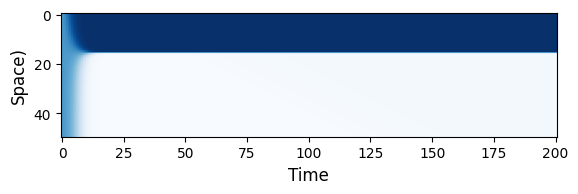

In [11]:
#  Starting with 2 random nodes, then any modules can be added or deleted 
start_module_list = [Node.generate(par_limits, par_choice_values, n_regimes=2) for i in range(2)]

# Population size should be even, adjust N to your computing capacity
N = 16 
P = Population(N, Somitogenesis_Landscape, landscape_pars, prob_pars,
                 fitness_pars, par_limits, par_choice_values, start_module_list=start_module_list)

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space)', fontsize=12)
plt.show()

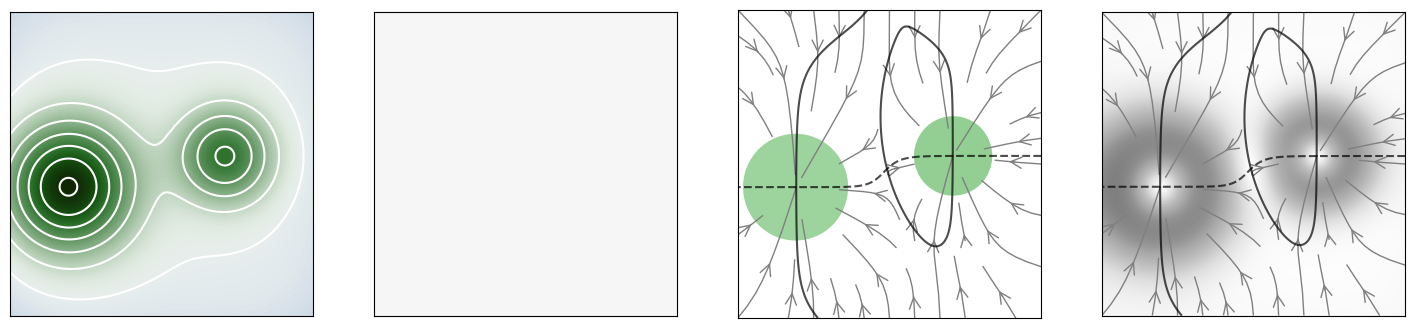

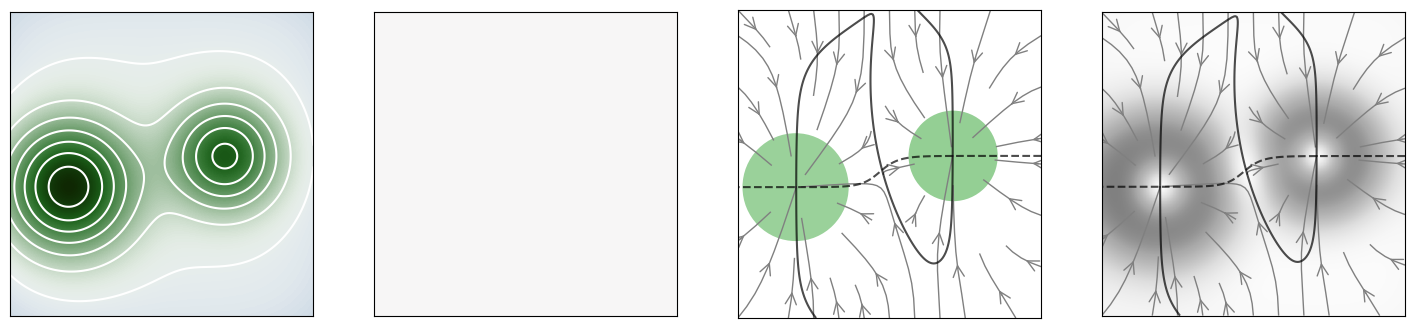

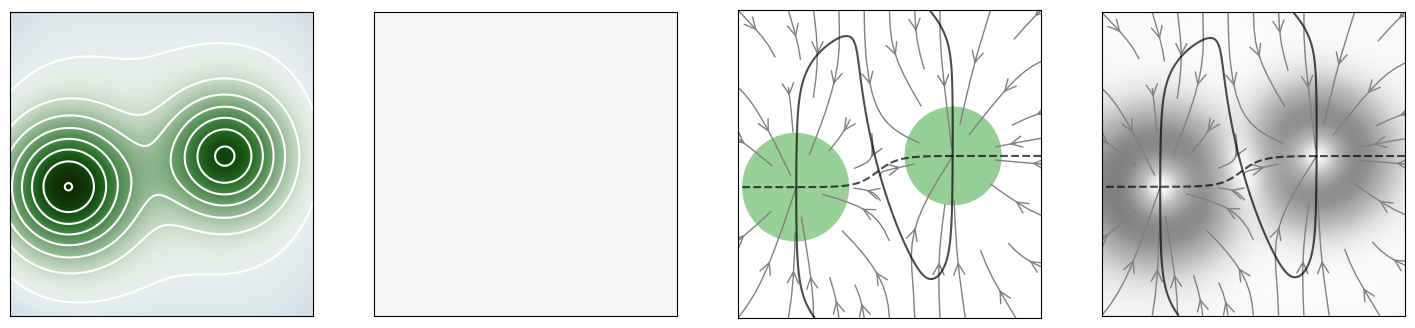

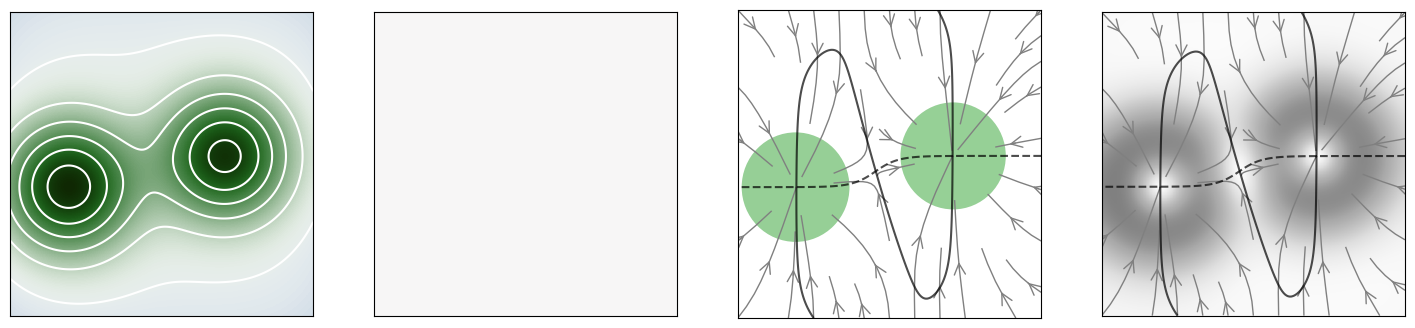

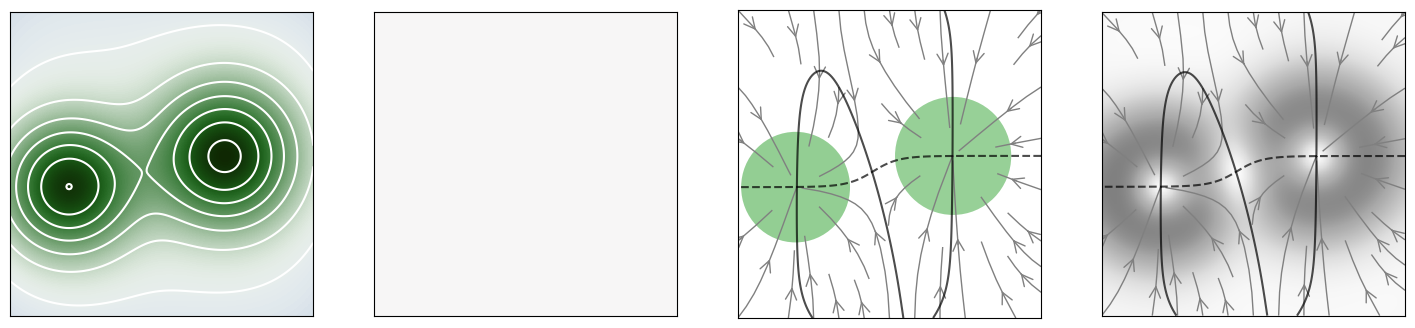

In [12]:
landscape = P.landscape_list[0]

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
times = np.array((-5,-2, 0, 2, 5,))
dX, dY = visualize_all(landscape, xx, yy, times, density=0.45, color_scheme='fp_types', plot_traj=True,
                             traj_init_cond=(0., 0.), traj_times=(0., 25., 251), traj_start=100)


Timecode: 20240612-180506
Best fitness: 0.9999999608189775
CPU times: user 168 ms, sys: 99.5 ms, total: 267 ms
Wall time: 31min 28s
Done


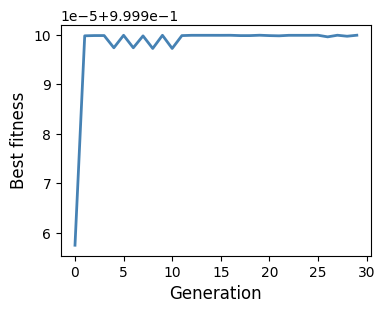

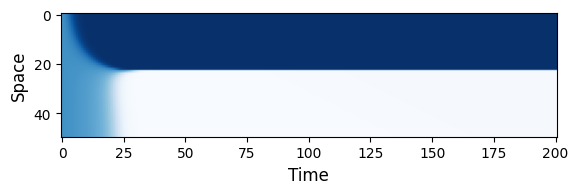

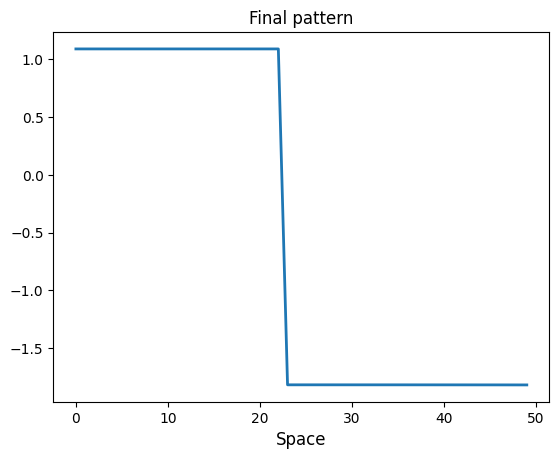

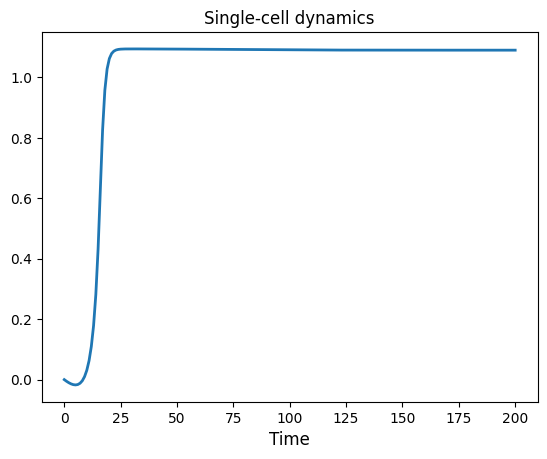

Landscape with modules:
Node at (-1.85732, 0.6897), a = [2.0916  3.18001], s = [0.68509 0.93118], tau = 5.0,
Node at (1.09693, -1.09259), a = [3.0392  2.52443], s = [0.47141 1.15921], tau = 5.0


In [16]:
%time fitness_traj = P.evolve_parallel(30, fitness_pars, save_dir, save_each=5)
print('Done')

plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
# plt.ylim((-2,0))
plt.show()

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space', fontsize=12)
plt.show()

plt.plot(P.landscape_list[0].result[:, -1], lw=2)
plt.title('Final pattern', fontsize=12)
plt.xlabel('Space', fontsize=12)
plt.show()

plt.plot(P.landscape_list[0].result[20, :], lw=2)
plt.title('Single-cell dynamics', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.show()

print(P.landscape_list[0])

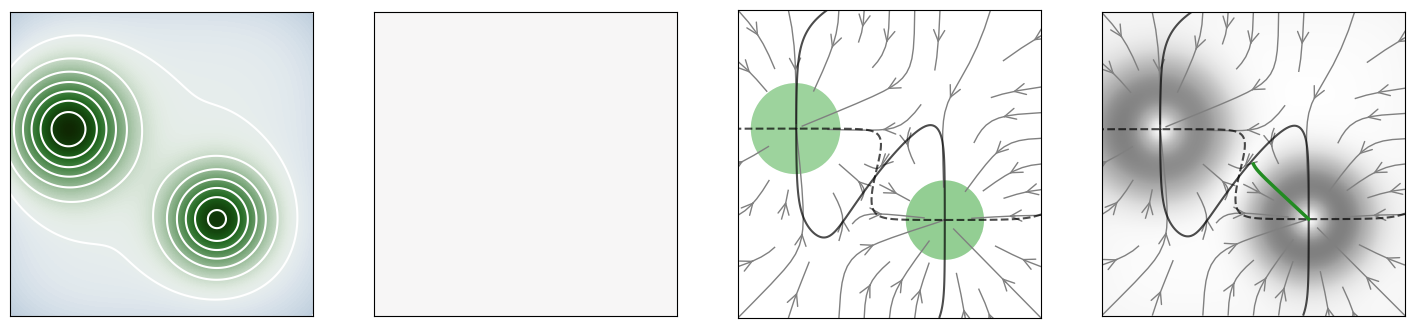

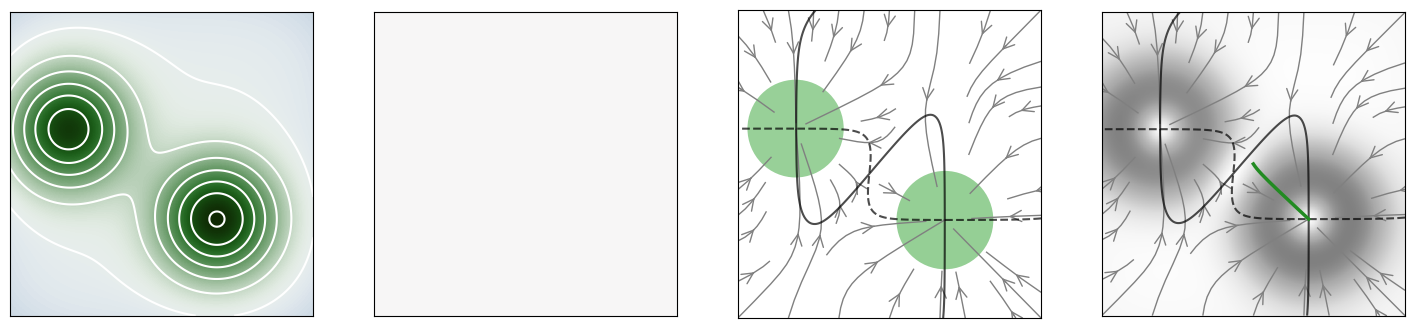

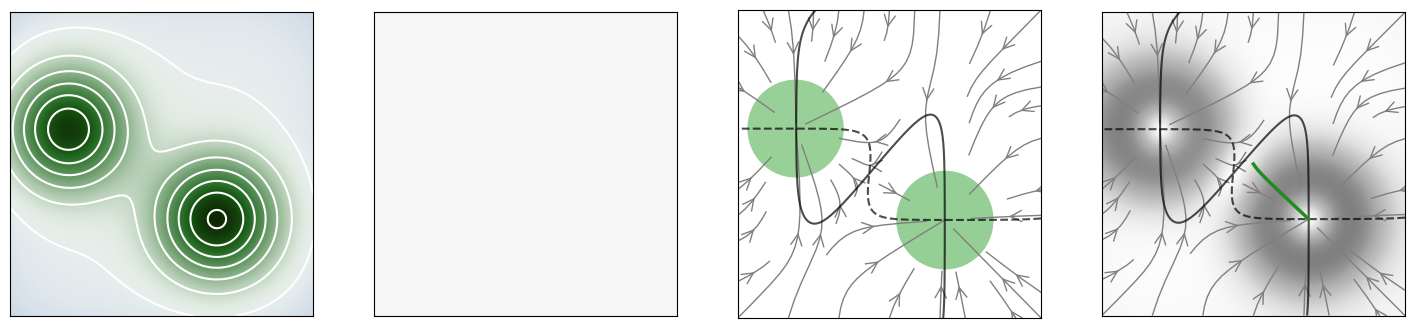

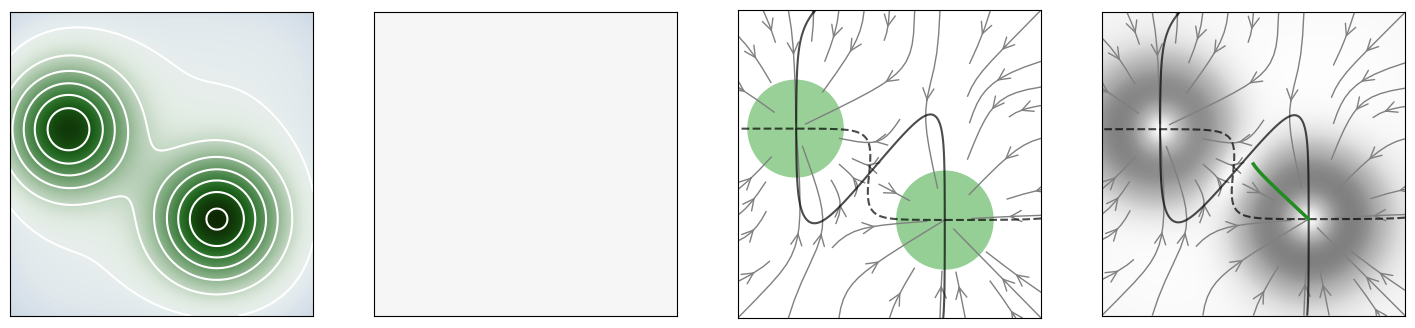

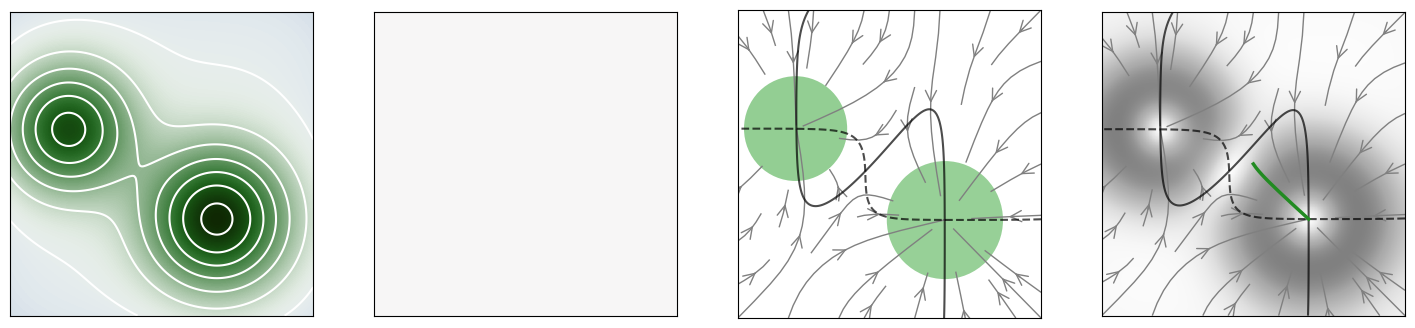

In [17]:
landscape = P.landscape_list[0]

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
times = np.array((-5, -0.1, 0., 0.1, 5.))
dX, dY = visualize_all(landscape, xx, yy, times, density=0.45, color_scheme='fp_types', plot_traj=True,
                       traj_init_cond=(0., 0.), traj_times=(0., 20., 201), traj_start=0)
